In [ ]:
!pip install pycaret

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["spd_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    221240.000000
mean          2.934942
std           2.021558
min           0.000000
25%           1.543332
50%           2.572220
75%           4.115552
max          22.121092
Name: spd_o, dtype: float64

In [4]:
#resample visibility mean hour before
station=station_all[["spd_o","temp_o"]].resample("H",label="right").mean()
station

,spd_o,temp_o
time,,
2008-01-01 01:00:00,3.601108,278.550001
2008-01-01 02:00:00,3.086664,278.050000
2008-01-01 03:00:00,4.372774,277.100000
2008-01-01 04:00:00,3.343886,277.950001
2008-01-01 05:00:00,4.372774,275.799999
...,...,...
2020-12-24 20:00:00,1.543332,280.149999
2020-12-24 21:00:00,1.028888,279.150000
2020-12-24 22:00:00,2.057776,278.150000


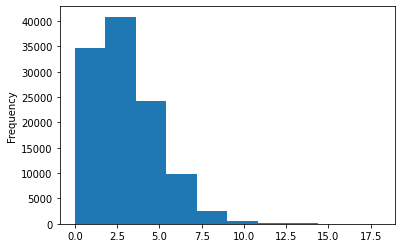

In [5]:
from locale import normalize
#station.value_counts()
station["spd_o"].plot.hist();

**Forecast D0**

In [6]:
#ria forecast d0
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,144.628357,3.831499,6.448897,102287.132812,280.022430,0.892607,24102.808594,12.980614,293.892212,0.0,...,0.0,-0.000188,1.0,0.000000,0.000000,1.00000,5597.893066,1497.146240,253.327194,277.210388
2008-01-01 02:00:00,147.921097,3.832692,6.672883,102206.570312,280.007874,0.876593,24068.431641,16.218111,301.791016,0.0,...,0.0,0.000039,1.0,0.000000,0.530000,1.00000,5589.398926,1489.944702,252.961868,277.016876
2008-01-01 03:00:00,143.393280,5.442433,8.808276,102199.117188,280.104797,0.852357,24079.357422,30.171259,310.720306,0.0,...,0.0,0.000066,1.0,0.000000,1.000000,1.00000,5583.069824,1489.035278,252.982819,276.464508
2008-01-01 04:00:00,148.121201,5.950326,9.456440,102130.187500,280.257111,0.826763,24082.630859,39.340668,311.036621,0.0,...,0.0,0.000102,1.0,0.000000,1.000000,1.00000,5578.958984,1486.376465,252.923691,276.808807
2008-01-01 05:00:00,144.934830,6.004587,9.431707,102095.398438,280.096802,0.815603,24156.925781,38.444511,268.789703,0.0,...,0.0,-0.000305,0.0,0.000000,0.000000,0.00000,5576.894043,1483.500488,253.006378,277.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,0.0,...,0.0,0.000750,0.6,0.093750,0.000000,0.60000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,0.0,...,0.0,0.000316,0.5,0.500000,0.531250,0.53125,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,0.0,...,0.0,-0.000039,0.6,0.500000,0.453125,0.60000,5681.215820,1519.740967,258.154877,280.516174


In [7]:
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k

,spd_o,temp_o,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,3.601108,278.550001,144.628357,3.831499,6.448897,102287.132812,280.022430,0.892607,24102.808594,12.980614,...,0.0,-0.000188,1.0,0.000000,0.000000,1.00000,5597.893066,1497.146240,253.327194,277.210388
2008-01-01 02:00:00,3.086664,278.050000,147.921097,3.832692,6.672883,102206.570312,280.007874,0.876593,24068.431641,16.218111,...,0.0,0.000039,1.0,0.000000,0.530000,1.00000,5589.398926,1489.944702,252.961868,277.016876
2008-01-01 03:00:00,4.372774,277.100000,143.393280,5.442433,8.808276,102199.117188,280.104797,0.852357,24079.357422,30.171259,...,0.0,0.000066,1.0,0.000000,1.000000,1.00000,5583.069824,1489.035278,252.982819,276.464508
2008-01-01 04:00:00,3.343886,277.950001,148.121201,5.950326,9.456440,102130.187500,280.257111,0.826763,24082.630859,39.340668,...,0.0,0.000102,1.0,0.000000,1.000000,1.00000,5578.958984,1486.376465,252.923691,276.808807
2008-01-01 05:00:00,4.372774,275.799999,144.934830,6.004587,9.431707,102095.398438,280.096802,0.815603,24156.925781,38.444511,...,0.0,-0.000305,0.0,0.000000,0.000000,0.00000,5576.894043,1483.500488,253.006378,277.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,3.858330,287.150000,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,...,0.0,0.000750,0.6,0.093750,0.000000,0.60000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,4.372774,287.150000,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,...,0.0,0.000316,0.5,0.500000,0.531250,0.53125,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,3.343886,287.150000,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,...,0.0,-0.000039,0.6,0.500000,0.453125,0.60000,5681.215820,1519.740967,258.154877,280.516174


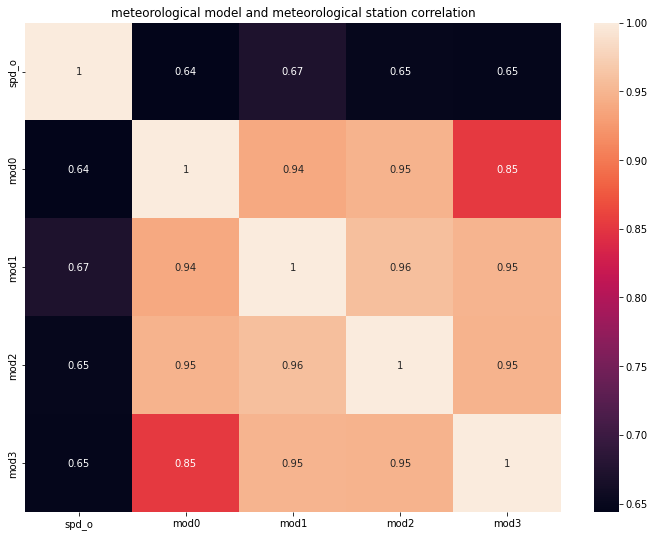

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("meteorological model and meteorological station correlation")
metmodel_Rs=df_all4k[["spd_o","mod0","mod1","mod2","mod3",]].corr()

sns.heatmap(metmodel_Rs,annot=True);

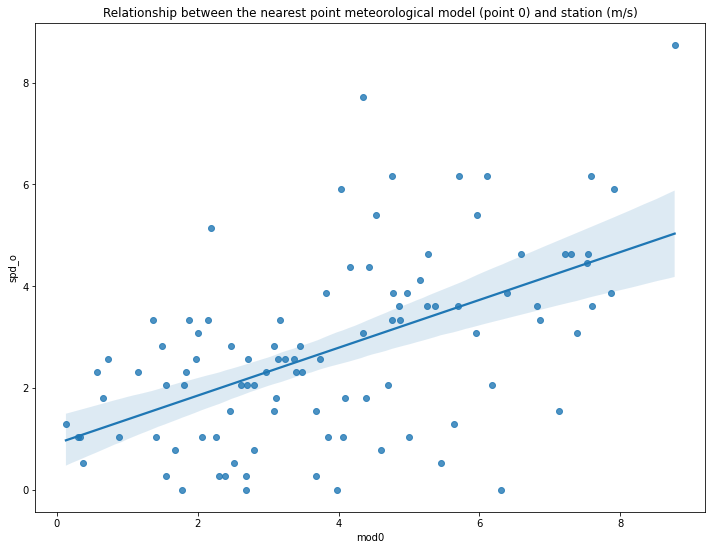

In [9]:
plt.figure(figsize=(12, 9))
plt.title("Relationship between the nearest point meteorological model (point 0) and station (m/s)")
df_sample=df_all4k[["mod0","spd_o"]]
sns.regplot( x="mod0", y="spd_o",data=df_sample.sample(100),);

In [10]:
df_sample

,mod0,spd_o
time,,
2008-01-01 01:00:00,3.831499,3.601108
2008-01-01 02:00:00,3.832692,3.086664
2008-01-01 03:00:00,5.442433,4.372774
2008-01-01 04:00:00,5.950326,3.343886
2008-01-01 05:00:00,6.004587,4.372774
...,...,...
2020-11-11 19:00:00,4.803071,3.858330
2020-11-11 20:00:00,5.888032,4.372774
2020-11-11 21:00:00,5.852474,3.343886


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#MAE en kt
MAE=round(mean_absolute_error(df_sample.mod0,df_sample.spd_o ),2)
#MSE en kt
MSE=round(mean_squared_error(df_sample.mod0,df_sample.spd_o),2)
#R2
R2=round(r2_score(df_sample.mod0,df_sample.spd_o),2)


df_r=pd.DataFrame({"MAE":MAE,"MSE":MSE,"R2":R2},index=["results"]);
df_r

,MAE,MSE,R2
results,1.55,4.16,0.25


**Forecast D1**

In [12]:
#forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,187.022110,8.649026,15.076856,100682.117188,284.099640,0.950480,3850.537842,18.529049,365.889740,0.43,...,0.000000,-0.000117,0.0,1.001866,1.0000,1.001866,5441.062012,1395.217041,250.198868,277.625000
2008-01-02 01:00:00,223.194687,4.872746,8.553699,100766.039062,284.302551,0.952351,24042.478516,7.432752,365.840179,1.41,...,271.859985,-0.630313,1.0,1.003662,1.0000,1.003662,5421.849121,1390.475952,249.379623,276.878235
2008-01-02 02:00:00,213.398468,4.058958,7.745996,100725.421875,283.516113,0.931136,24043.144531,10.536634,361.979858,0.15,...,265.820007,-2.348477,0.0,0.003704,0.0000,0.003704,5403.857910,1385.831055,247.717194,276.178528
2008-01-02 03:00:00,193.151459,4.297006,8.272406,100640.812500,283.482239,0.911970,24036.058594,16.033491,323.539062,0.66,...,271.260010,-4.300562,1.0,0.000267,1.0000,1.000000,5392.368164,1382.380981,247.006317,275.906799
2008-01-02 04:00:00,185.437576,5.599997,9.705170,100599.703125,283.220490,0.917263,24037.439453,16.895048,324.586517,1.60,...,274.359985,-3.418750,1.0,0.003440,1.0000,1.000000,5385.979004,1380.468018,246.807068,276.245819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 19:00:00,157.686142,1.743530,4.707931,102008.992188,286.765930,0.922937,24102.066406,4.728705,312.395416,0.00,...,0.000000,-0.002773,0.0,0.500000,0.4000,0.500000,5657.847168,1509.066895,256.351013,281.325867
2020-11-12 20:00:00,132.306030,0.214833,3.802512,102066.460938,286.126678,0.942450,24164.826172,2.759448,370.614349,0.00,...,0.000000,0.000352,0.0,0.300000,0.5000,0.500000,5660.977051,1513.237671,256.373871,281.351135
2020-11-12 21:00:00,136.384262,1.121570,5.705152,102124.367188,286.267761,0.931932,24214.123047,3.625571,351.971375,0.00,...,0.000000,0.000469,0.0,0.300000,0.0625,0.300000,5664.547852,1517.838257,256.420868,280.955627


In [13]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["temp_o"])


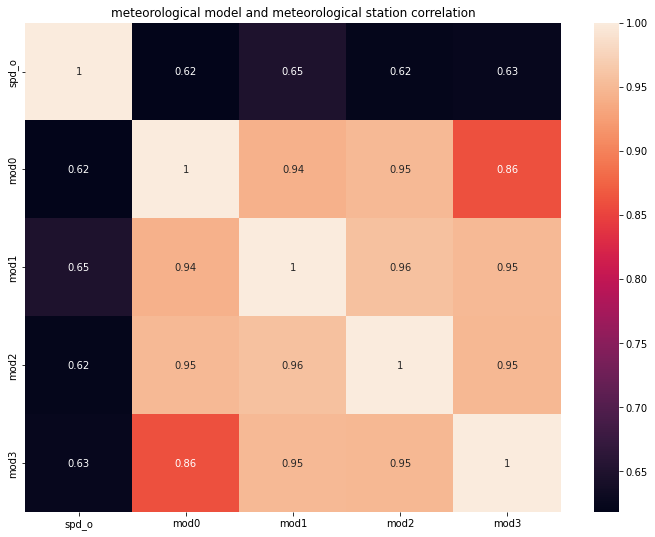

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("meteorological model and meteorological station correlation")
metmodel_Rs=df_all4k[["spd_o","mod0","mod1","mod2","mod3",]].corr()

sns.heatmap(metmodel_Rs,annot=True);

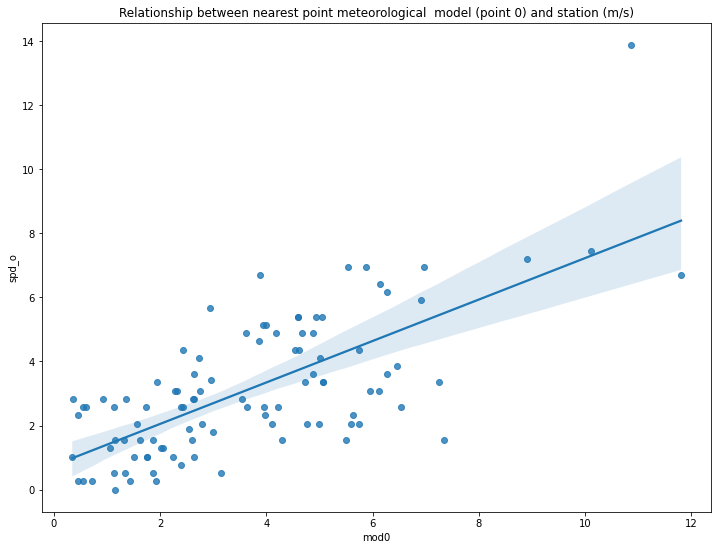

In [15]:
plt.figure(figsize=(12, 9))
plt.title("Relationship between nearest point meteorological  model (point 0) and station (m/s)")
df_sample=df_all4k[["mod0","spd_o"]]
sns.regplot( x="mod0", y="spd_o",data=df_sample.sample(100),);

In [16]:
df_sample

,mod0,spd_o
time,,
2008-01-02 00:00:00,8.649026,3.858330
2008-01-02 01:00:00,4.872746,4.372774
2008-01-02 02:00:00,4.058958,6.173328
2008-01-02 03:00:00,4.297006,6.173328
2008-01-02 04:00:00,5.599997,3.343886
...,...,...
2020-11-12 19:00:00,1.743530,2.829442
2020-11-12 20:00:00,0.214833,2.829442
2020-11-12 21:00:00,1.121570,3.086664


In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#MAE en kt
MAE=round(mean_absolute_error(df_sample.mod0,df_sample.spd_o ),2)
#MSE en kt
MSE=round(mean_squared_error(df_sample.mod0,df_sample.spd_o),2)
#R2
R2=round(r2_score(df_sample.mod0,df_sample.spd_o),2)


df_r=pd.DataFrame({"MAE":MAE,"MSE":MSE,"R2":R2},index=["results"]);
df_r

,MAE,MSE,R2
results,1.58,4.33,0.22


**Forecast D2**

In [18]:
#forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD2.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-03 00:00:00,206.576370,13.441932,20.494396,99404.250000,284.935425,0.907369,23649.560547,49.922935,367.573120,0.309999,...,51.259998,-3.387930,1.0,1.000000,1.0,1.00000,5335.585938,1306.213989,252.110870,278.115875
2008-01-03 01:00:00,249.524155,7.476007,12.060588,99438.367188,284.337952,0.951936,24045.646484,15.650241,362.663208,0.830000,...,234.119995,-1.582227,0.0,0.000400,0.0,0.00040,5318.325195,1302.568970,250.218872,277.330872
2008-01-03 02:00:00,257.510162,8.076884,11.960196,99371.398438,283.966827,0.865066,24038.871094,49.237343,308.454529,0.830002,...,302.040009,-2.166602,0.0,0.001470,0.0,0.00147,5290.307129,1294.698975,248.110870,276.629181
2008-01-03 03:00:00,248.424072,5.578326,9.905057,99245.070312,283.774689,0.895480,24041.279297,27.362829,361.054260,1.559999,...,313.420013,-6.937227,1.0,0.004851,1.0,1.00000,5275.147949,1292.057007,247.400818,275.849365
2008-01-03 04:00:00,254.242538,5.558128,9.436005,99232.953125,283.196259,0.911944,24042.353516,20.683023,355.423706,1.070000,...,353.160004,-2.058516,1.0,0.001348,1.0,1.00000,5267.083008,1286.957031,246.942505,276.323120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13 19:00:00,148.962616,1.988266,3.707509,101991.507812,285.827637,0.864524,24123.822266,7.544930,296.270081,0.000000,...,0.000000,-0.000188,0.0,0.000000,0.0,0.00000,5668.866211,1509.045654,257.169434,282.452698
2020-11-13 20:00:00,139.009293,3.125138,4.924909,101986.445312,285.622681,0.832215,24111.478516,18.881458,295.349426,0.000000,...,0.000000,0.000625,0.0,0.000000,0.0,0.00000,5670.262207,1508.821533,257.258301,282.588745
2020-11-13 21:00:00,131.104584,3.297197,5.119483,101984.140625,285.416138,0.850643,24124.947266,17.145035,292.297729,0.000000,...,0.000000,0.000063,0.0,0.000000,0.0,0.00000,5671.367188,1507.840942,257.327240,282.685944


In [19]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["temp_o"])


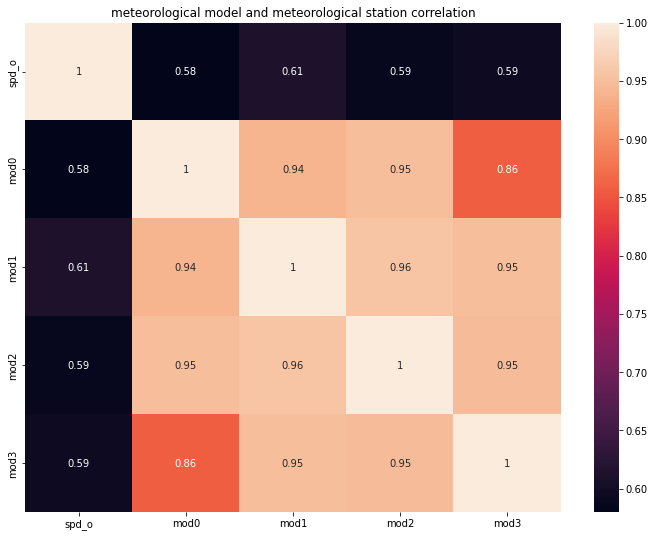

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("meteorological model and meteorological station correlation")
metmodel_Rs=df_all4k[["spd_o","mod0","mod1","mod2","mod3",]].corr()

sns.heatmap(metmodel_Rs,annot=True);

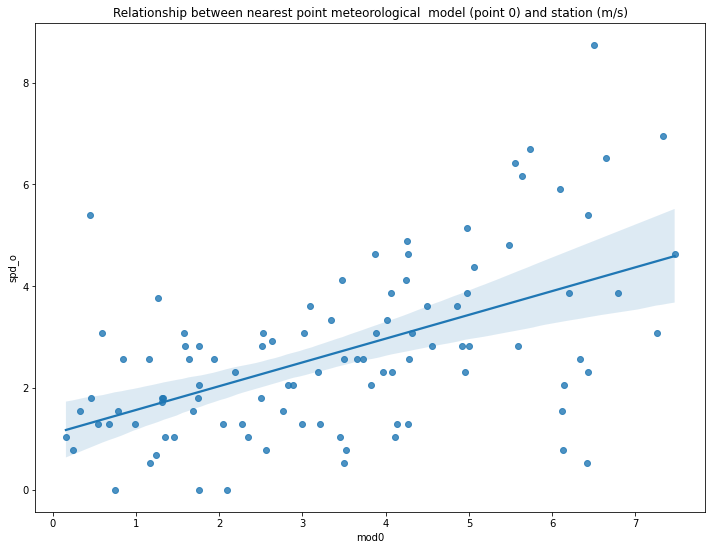

In [21]:
plt.figure(figsize=(12, 9))
plt.title("Relationship between nearest point meteorological  model (point 0) and station (m/s)")
df_sample=df_all4k[["mod0","spd_o"]]
sns.regplot( x="mod0", y="spd_o",data=df_sample.sample(100),);

In [22]:
df_sample

,mod0,spd_o
time,,
2008-01-03 00:00:00,13.441932,9.774436
2008-01-03 01:00:00,7.476007,10.031658
2008-01-03 02:00:00,8.076884,5.401662
2008-01-03 03:00:00,5.578326,6.173328
2008-01-03 04:00:00,5.558128,2.314998
...,...,...
2020-11-13 19:00:00,1.988266,2.829442
2020-11-13 20:00:00,3.125138,4.115552
2020-11-13 21:00:00,3.297197,3.858330


In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#MAE en kt
MAE=round(mean_absolute_error(df_sample.mod0,df_sample.spd_o ),2)
#MSE en kt
MSE=round(mean_squared_error(df_sample.mod0,df_sample.spd_o),2)
#R2
R2=round(r2_score(df_sample.mod0,df_sample.spd_o),2)


df_r=pd.DataFrame({"MAE":MAE,"MSE":MSE,"R2":R2},index=["results"]);
df_r

,MAE,MSE,R2
results,1.63,4.65,0.16


**machine learning d2**

In [25]:
from pycaret.regression import *

reg = setup(df_all4k,
             target = 'spd_o',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)
              

,Description,Value
0,session_id,20
1,Target,spd_o
2,Original Data,"(111535, 231)"
3,Missing Values,False
4,Numeric Features,230
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(94804, 14)"


KeyError: ignored

In [28]:
compare_models(fold=5,sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0390,1.7924,1.3388,0.5273,0.3963,0.6597,30.476
lightgbm,Light Gradient Boosting Machine,1.0633,1.8627,1.3648,0.5087,0.4023,0.6726,1.062
gbr,Gradient Boosting Regressor,1.0983,1.9605,1.4002,0.4829,0.4114,0.6970,36.762
lr,Linear Regression,1.1663,2.1908,1.4801,0.4222,0.4294,0.7374,0.790
ridge,Ridge Regression,1.1663,2.1908,1.4801,0.4222,0.4294,0.7374,0.052
br,Bayesian Ridge,1.1664,2.1909,1.4801,0.4222,0.4294,0.7376,0.092
huber,Huber Regressor,1.1696,2.2266,1.4922,0.4128,0.4274,0.7213,1.348
knn,K Neighbors Regressor,1.1987,2.3980,1.5485,0.3676,0.4433,0.7453,1.932
en,Elastic Net,1.2006,2.2991,1.5163,0.3936,0.4386,0.7788,0.074
omp,Orthogonal Matching Pursuit,1.2098,2.3701,1.5395,0.3749,0.4444,0.7763,0.052


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=20, verbose=0, warm_start=False)

In [26]:
model=create_model("lightgbm",n_estimators=150,fold=5)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Split  Fold                                                
CV-Val 0     1.0535  1.8323  1.3536  0.5090  0.3988  0.6787
       1     1.0624  1.8604  1.3640  0.5115  0.4009  0.6655
       2     1.0607  1.8559  1.3623  0.5054  0.4056  0.6721
       3     1.0640  1.8842  1.3727  0.5101  0.4021  0.6600
       4     1.0535  1.8223  1.3499  0.5231  0.3980  0.6682
       Mean  1.0588  1.8510  1.3605  0.5118  0.4011  0.6689
       Std   0.0045  0.0219  0.0080  0.0060  0.0027  0.0063
Train  NaN   1.0195  1.6994  1.3036  0.5518  0.3903  0.6479

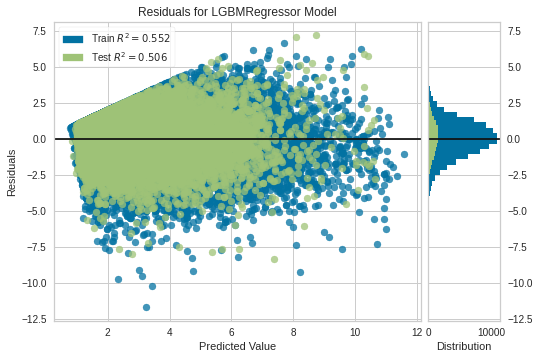

In [27]:
plot_model(model)

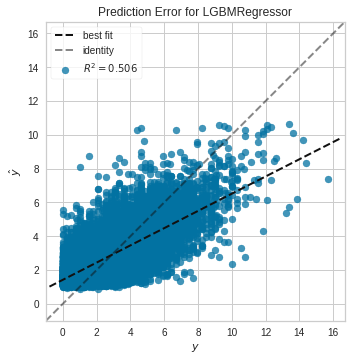

In [28]:
plot_model(model,plot = 'error')

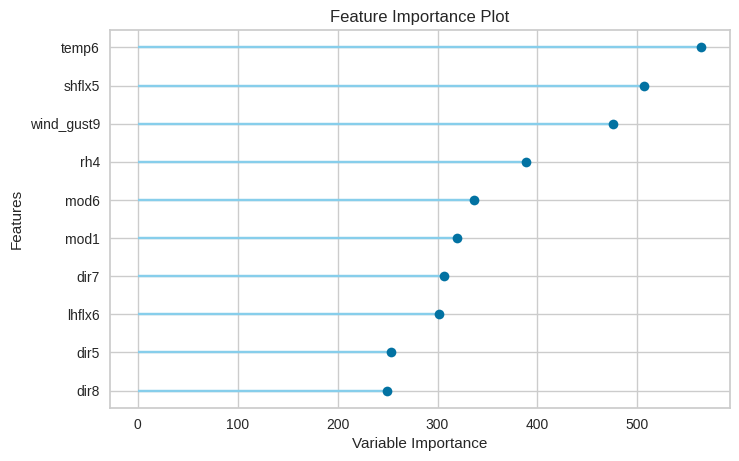

In [29]:
plot_model(model,plot = "feature")

**Export model**

In [30]:
x_var=get_config("X_train").columns
x_var

Index(['dir6', 'dir5', 'rh4', 'lhflx6', 'temp6', 'dir2', 'dir7', 'shflx5',
       'dir8', 'mod1', 'mod6', 'dir0', 'wind_gust9', 'dir4'],
      dtype='object')

In [31]:
#define x and y
Y=df_all4k.spd_o
X=df_all4k[x_var]

In [33]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
#ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)
ml_model=LGBMRegressor(n_estimators=150).fit(X_train,y_train)

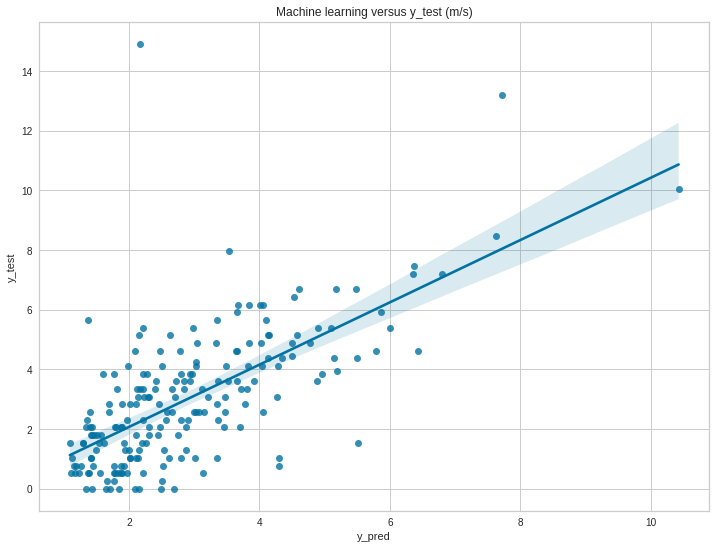

In [34]:
df_result=pd.DataFrame({"y_pred":ml_model.predict(X_test),"y_test":y_test})
plt.figure(figsize=(12, 9))
plt.title("Machine learning versus y_test (m/s)")
sns.regplot( x="y_pred", y="y_test",data=df_result.sample(200));

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#MAE en kt
MAE=round(mean_absolute_error(df_result.y_pred,df_result.y_test),2)
#MSE en kt
MSE=round(mean_squared_error(df_result.y_pred,df_result.y_test),2)
#R2
R2=round(ml_model.score(X_test,y_test),2)


df_r=pd.DataFrame({"MAE":MAE,"MSE":MSE,"R2":R2},index=["results"]);
df_r

,MAE,MSE,R2
results,1.07,1.92,0.5


In [38]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("spd_LEVX_d2.al", 'wb'))